# $$Data Science Assignment - Full Time$$
---
---

## Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/merged_data.csv")
pd.pandas.set_option("display.max_columns", None)
df.head()

,Unnamed: 0,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [4]:
print('df shape: {}'.format(df.shape))

df shape: (1000, 27)


## Data Cleaning

#### Check Null Values

In [5]:
# These are the features with nan value
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
try:
    for feature in features_with_na:
        print('{} : {} % missing values'.format(feature, np.round(df[feature].isnull().mean()*100,5)))
except Exception as e:
    print('Error: ', str(e))

Has_been_employed_for_at_least : 6.2 % missing values
Has_been_employed_for_at_most : 25.3 % missing values
Telephone : 59.6 % missing values
Savings_account_balance : 18.3 % missing values
Balance_in_existing_bank_account_(lower_limit_of_bucket) : 66.8 % missing values
Balance_in_existing_bank_account_(upper_limit_of_bucket) : 45.7 % missing values
Purpose : 1.2 % missing values
Property : 15.4 % missing values
Other_EMI_plans : 81.4 % missing values


## Other Data Cleaning steps

**Handling Duplicates**

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

- Remove `applicant_id` & `loan_application_id` from the dataset as it cannot used in Model Training.
- `Telephone` isn't an important feature, hence removing this one also.


- As a Report form the EDA below feautes are independent to the target columnn (Not-Correlated with target), hence these also can be removed.
 - `Employment_status`
 - `Other_EMI_plans`
 - `Number_of_dependents`
 - `Years_at_current_residence`
 - `EMI_rate_in_percentage_of_disposable_income`
 - `Has_coapplicant`
 - `Has_guarantor`
- There are more than 40% of missing values present in below features, we can not remove entire rows as there is small dataset and filling missing values with most_frequent_category will make it more imbalance data, it would be biased, hence we will drop these feature columns.
 - `Balance_in_existing_bank_account_(lower_limit_of_bucket)` : 66.8 % missing values
 - `Balance_in_existing_bank_account_(upper_limit_of_bucket)` : 45.7 % missing values
- As a Report form the EDA `Number_of_existing_loans_at_this_bank` also showing independent to the target columnn, however as per domain knowledge, it is an important feature.

In [7]:
df = df.drop(['applicant_id', 'loan_application_id', 'Telephone', 'Employment_status', 'Other_EMI_plans', \
         'Number_of_dependents', 'Years_at_current_residence', 'EMI_rate_in_percentage_of_disposable_income', \
         'Has_coapplicant', 'Has_guarantor', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', \
         'Balance_in_existing_bank_account_(upper_limit_of_bucket)'] , axis=1)
df.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Housing,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,Property,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,own,7 years,NaN,1,NaN,6,electronic equipment,1169000,real estate,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,own,1 year,4 years,1,Low,48,electronic equipment,5951000,real estate,1,existing loans paid back duly till now,1
2,49,male,single,own,4 years,7 years,1,Low,12,education,2096000,real estate,1,critical/pending loans at other banks,0
3,45,male,single,for free,4 years,7 years,1,Low,42,FF&E,7882000,building society savings agreement/life insurance,1,existing loans paid back duly till now,0
4,53,male,single,for free,1 year,4 years,1,Low,24,new vehicle,4870000,NaN,2,delay in paying off loans in the past,1


In [8]:
df.shape

(1000, 15)

## Feature Engineering

### Type of Features

**Numeric Features**

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(numeric_features))
numeric_features

Num of Numerical Features : 6


['Primary_applicant_age_in_years',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

**Categorical Features**

In [10]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(categorical_features))
categorical_features

Num of Categorical Features : 9


['Gender',
 'Marital_status',
 'Housing',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history']

**Discrete Features**

In [11]:
discrete_features = [feature for feature in numeric_features if (len(df[feature].unique())<=25)]
print('Num of Discrete Features :',len(discrete_features))
discrete_features

Num of Discrete Features : 3


['Foreign_worker',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

**Continuous features**

In [12]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Num of Continuous Features :',len(continuous_features))
continuous_features

Num of Continuous Features : 3


['Primary_applicant_age_in_years',
 'Months_loan_taken_for',
 'Principal_loan_amount']

**Handling missing values for categorical features**

In [13]:
# These are the features with nan value
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
try:
    for feature in features_with_na:
        print('{} : {} % missing values'.format(feature, np.round(df[feature].isnull().mean()*100,5)))
except Exception as e:
    print('Error: ', str(e))

Has_been_employed_for_at_least : 6.2 % missing values
Has_been_employed_for_at_most : 25.3 % missing values
Savings_account_balance : 18.3 % missing values
Purpose : 1.2 % missing values
Property : 15.4 % missing values


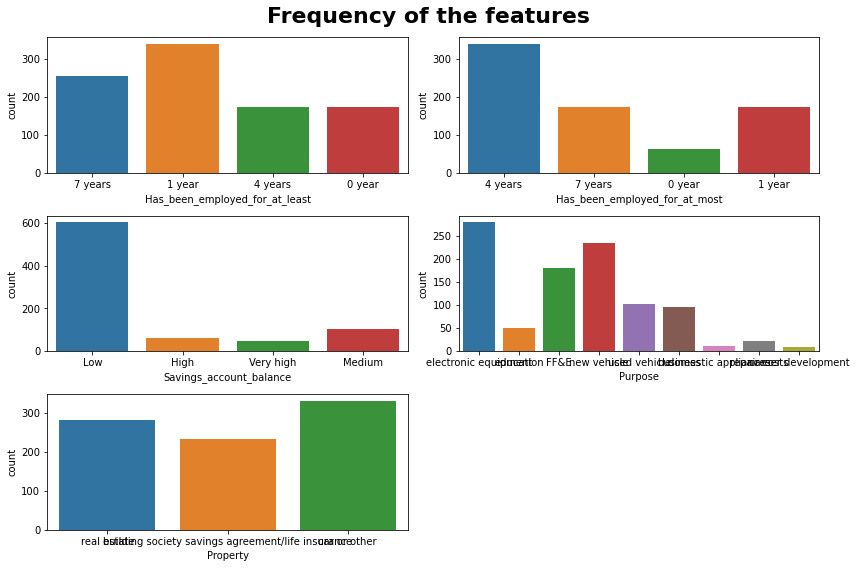

In [14]:
# Compute the frequency with every feature --
plt.figure(figsize=(12, 8))
plt.suptitle('Frequency of the features', fontsize=22, fontweight='bold')

# Adjusting space between/among subplots
plt.subplots_adjust(hspace=0.2)

for i in range(0, len(features_with_na)):
    plt.subplot(3, 2, i+1)
    sb.countplot(x=df[features_with_na[i]])
    plt.xlabel(features_with_na[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

In [15]:
# Handling missing values with most_frequent_category --
def impute_nan(df, variable):
    try:
        most_frequent_category = df[variable].mode()[0]
        df[variable] = df[variable].fillna(most_frequent_category)
        return df
    except Exception as e:
        print('Error: ', str(e))
        
for feature in features_with_na:
    impute_nan(df, feature)

**Imputing Null Values to Check VIF(Multi-Collinearity)**

In [16]:
# Create copy of dataframe to check variance inflation factor
df1 = df.copy()
try:
    for i in continuous_features:
        df1[i].fillna(df1[i].median(), inplace=True)
except Exception as e:
    print('Error: ', str(e))

### Multicollinearity Check
#### Variance Inflation Factor (VIF)

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

class MultiColliniarity:
    
    def __init__(self):
        pass
    
    def compute_vif(self, considered_features, df):
        try:
            X = df[considered_features]
            # the calculation of variance inflation requires a constant
            X['intercept'] = 1

            # create dataframe to store vif values
            vif = pd.DataFrame()
            vif["Variable"] = X.columns
            vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
            vif = vif[vif['Variable']!='intercept']
            return vif
        except Exception as e:
            print('Error: ', str(e))

In [18]:
MultiColliniarity = MultiColliniarity()
MultiColliniarity.compute_vif(continuous_features, df1)

,Variable,VIF
0,Primary_applicant_age_in_years,1.006365
1,Months_loan_taken_for,1.649649
2,Principal_loan_amount,1.649260


 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “ 

VIF above 5 is indicator of Multicollinearity  

**- This Dataset Doesnt have any Multicollinearity**

### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

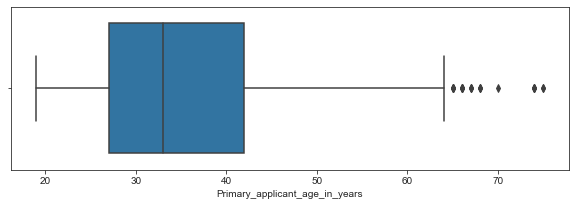

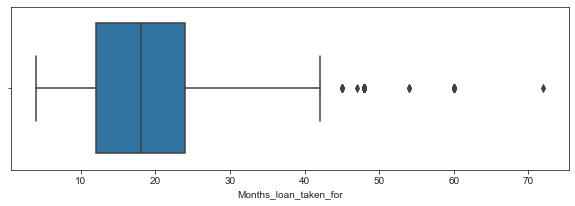

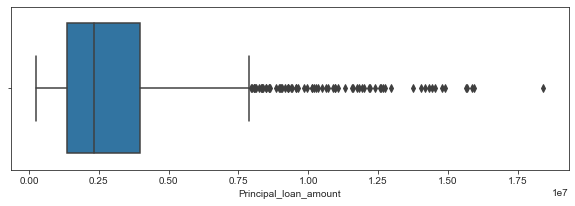

In [19]:
for i in continuous_features:
    plt.figure(figsize=(10, 3))
    sb.set_style('ticks')
    ax = sb.boxplot(df[i])

**Standard deviation method For Outlier Handling?**

- Outlier removal using standard deviation procedure.
- Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method.
- Here we can remove outliers after 3rd standard deviation or z-score +3 and -3. used to remove only extreme outlier points

In [20]:
def outlier_removal(column, df):
    try:
        upper_limit = df[column].mean() + 3*df[column].std()
        lower_limit = df[column].mean() - 3*df[column].std()
        df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
        return df
    except Exception as e:
        print('Error: ', str(e))

In [21]:
print('shape before outlier removal: {}'.format(df.shape))

shape before outlier removal: (1000, 15)


In [22]:
outlier_feature = ['Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']

for i in range(len(outlier_feature)):
    df = outlier_removal(outlier_feature[i], df)

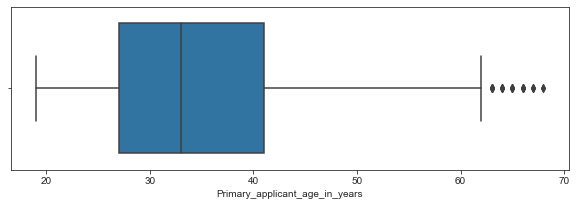

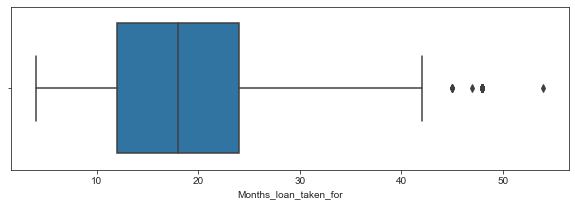

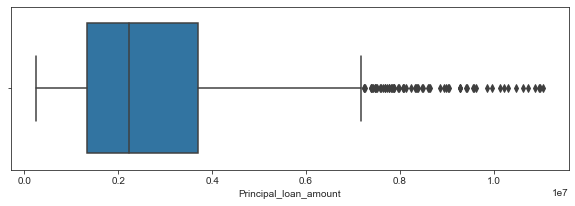

In [23]:
for i in continuous_features:
    plt.figure(figsize=(10, 3))
    sb.set_style('ticks')
    ax = sb.boxplot(df[i])

In [24]:
print('shape after outlier removal: {}'.format(df.shape))

shape after outlier removal: (955, 15)


## Feature Transformation

In [25]:
df[continuous_features].skew(axis=0)

Primary_applicant_age_in_years    0.920199
Months_loan_taken_for             0.906375
Principal_loan_amount             1.451907
dtype: float64

* **If Skewness is above 2 then the feature is Highly skewed**
* **If Skewness is above 1.5 then the feature is Moderately skewed**

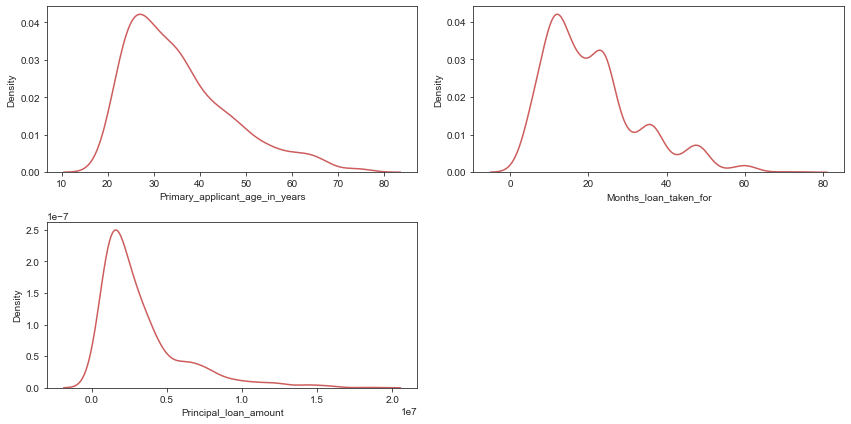

In [26]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 2, i+1)
    sb.kdeplot(x=df1[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

- **All these seems slightly right skewed**

### Split dataset

In [27]:
# Splitting the dataset into independent & dependent feature. 
X= df.drop('high_risk_applicant', axis=1)   # Independent features
y= df['high_risk_applicant']                # dependent feature

print('Independent features X_shape: ', X.shape)
print('dependent feature y_shape: ', y.shape)

Independent features X_shape:  (955, 14)
dependent feature y_shape:  (955,)


* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the `high_risk_applicant` column.**


In [28]:
for feature in categorical_features:
    print(feature,':', X[feature].nunique())

Gender : 2
Marital_status : 4
Housing : 3
Has_been_employed_for_at_least : 4
Has_been_employed_for_at_most : 4
Savings_account_balance : 4
Purpose : 9
Property : 3
Loan_history : 5


## Feature Encoding and Scaling

**Feature `Savings_account_balance` is a kind of ordinal categorical feature, where order of sequence matter.**

In [29]:
Savings_account_balance_ordinal = {'Low':0, 'Medium':1, 'High':2, 'Very high':3}
Savings_account_balance_ordinal

{'Low': 0, 'Medium': 1, 'High': 2, 'Very high': 3}

In [30]:
X['Savings_account_balance'] = X['Savings_account_balance'].map(Savings_account_balance_ordinal)

**Feature `Purpose` have many categories, however order doesn't matter, hence we will use Label Encoding to convert this categorical feature into numerical.**

In [31]:
# Label Encoding
def le_ordinal(df, le_feature):
    try:
        df[feature] = le.fit_transform(df[feature])
        return df
    except Exception as e:
        print('Error: ', str(e))


# LabelEncoder
le = LabelEncoder()
le_features = ['Purpose']

for feature in le_features:
    le_ordinal(X, feature)

In [32]:
X.head(2)

,Primary_applicant_age_in_years,Gender,Marital_status,Housing,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,Property,Number_of_existing_loans_at_this_bank,Loan_history
0,67,male,single,own,7 years,4 years,1,0,6,5,1169000,real estate,2,critical/pending loans at other banks
1,22,female,divorced/separated/married,own,1 year,4 years,1,0,48,5,5951000,real estate,1,existing loans paid back duly till now


 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [33]:
for i in continuous_features:
    print(f'{i}: mean = {df[i].mean():.2f}, median = {df[i].median():.2f}')

Primary_applicant_age_in_years: mean = 35.22, median = 33.00
Months_loan_taken_for: mean = 20.03, median = 18.00
Principal_loan_amount: mean = 2916952.88, median = 2235000.00


- There are no missing values in continuous_features. 

* **Mean imputer:** Since we handeled outlier for the continuous features, the mean and median of the features are nearly same. When there are no outliers mean performs an a better imputer.
* **Standardscaler:** As the features distribution are nearly normal we use standard scaler.
* **Power Transformer:** Since features (`Primary_applicant_age_in_years`, `Months_loan_taken_for`, `Principal_loan_amount`) are skewed, we use Power Transformer on them.

In [34]:
# Create Column Transformer with 3 types of transformers
categorical_features = X.select_dtypes(include="object").columns
num_feature = numeric_features.copy()
num_feature.remove('high_risk_applicant')
transform_features=['Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']

In [35]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler())])
categorical_pipeline = Pipeline(steps=[('one_hot_encoder', OneHotEncoder()), 
                                       ('scaler', StandardScaler(with_mean=False))])
transform_pipe = Pipeline(steps=[('transformer', PowerTransformer(standardize=True))])

preprocessor = ColumnTransformer([("numeric_Pipeline", numeric_pipeline, num_feature), 
                                  ("Categorical_Pipeline", categorical_pipeline, categorical_features), 
                                  ("Power_Transformation", transform_pipe, transform_features)])

In [36]:
X = preprocessor.fit_transform(X)

## Handling Imbalanced Dataset

* Handling Imbalanced Target Variable.
* Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model.


* SMOTE is one of the famous oversampling techniques and is very effective in handling class imbalance. The idea is to combine SMOTE with some undersampling techniques (ENN, Tomek) to increase the effectiveness of handling the imbalanced class.

 **SMOTE+ENN** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
This method combines the SMOTE ability to generate synthetic data for minority class and uses ENN to remove overlapping observation of both the classes
 
 - **To add new data of minority class**
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - **To remove the data points of both classes**
 1. Determine K, as the number of nearest neighbors. If not determined, then K=3.
 2. Find the K-nearest neighbor of the observation among the other observations in the dataset, then return the majority class from the K-nearest neighbor.
 3. If the class of the observation and the majority class from the observation’s K-nearest neighbor is different, then the observation and its K-nearest neighbor are deleted from the dataset.
 4. Repeat step 2 and 3 until the desired proportion of each class is fulfilled.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [37]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42, sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Model Selection


* **Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning**

## Train Test Split

* The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

* It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

**Import Required packages for model training**

In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve 

In [39]:
def evaluate_clf(true, predicted):
    try:
        acc = accuracy_score(true, predicted)        # Calculate Accuracy
        f1 = f1_score(true, predicted)               # Calculate F1-score
        precision = precision_score(true, predicted) # Calculate Precision
        recall = recall_score(true, predicted)       # Calculate Recall
        roc_auc = roc_auc_score(true, predicted)     #Calculate Roc
        return acc, f1 , precision, recall, roc_auc
    except Exception as e:
        print('Error: ', str(e))

In [40]:
# Initialize models which are required for models
models = {"Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(), 
          "Logistic Regression": LogisticRegression(), 
          "K-Neighbors Classifier": KNeighborsClassifier(), 
          "XGBClassifier": XGBClassifier(), 
          "AdaBoost Classifier": AdaBoostClassifier()}

- Here we are not considering SVM & Decision Tree because -
  - SVM is time consuming.
  - Decision Tree have overfitting problem & already using ensemble techniques for better performance.

In [41]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input.
    It splits the data into Train Test split.
    Iterates through the given model dictionary and evaluates the metrics.
    Returns: Dataframe which contains report of all models metrics with cost.
    '''
    # separate dataset into train and test
    # from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models_list, accuracy_list, auc = [], [], []

    try:
        for i in range(len(list(models))):
            model = list(models.values())[i]
            model.fit(X_train, y_train) # Train model

            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Training set performance
            model_train_accuracy, model_train_f1, model_train_precision,\
            model_train_recall, model_train_rocauc_score = evaluate_clf(y_train ,y_train_pred)

            # Test set performance
            model_test_accuracy,model_test_f1,model_test_precision,\
            model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

            print(list(models.keys())[i])
            models_list.append(list(models.keys())[i])

            print('Model performance for Training set')
            print("- Accuracy: {:.4f}".format(model_train_accuracy))
            print('- F1 score: {:.4f}'.format(model_train_f1)) 
            print('- Precision: {:.4f}'.format(model_train_precision))
            print('- Recall: {:.4f}'.format(model_train_recall))
            print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

            print('--'*50)

            print('Model performance for Test set')
            print('- Accuracy: {:.4f}'.format(model_test_accuracy))
            accuracy_list.append(model_test_accuracy)
            print('- F1 score: {:.4f}'.format(model_test_f1))
            print('- Precision: {:.4f}'.format(model_test_precision))
            print('- Recall: {:.4f}'.format(model_test_recall))
            print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
            auc.append(model_test_rocauc_score)
            print('=='*50)
            print('\n')

        report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

        return report
    
    except Exception as e:
        print('Error: ', str(e))

## Evaluate all base Models

In [42]:
base_report = evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.8741
- F1 score: 0.8816
- Precision: 0.8590
- Recall: 0.9054
- Roc Auc Score: 0.8730


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9683
- F1 score: 0.9726
- Precision: 0.9639
- Recall: 0.9816
- Roc Auc Score: 0.9660
----------------------------------------------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.8462
- F1 score: 0.8608
- Precision: 0.8095
- Recall: 0.9189
- Roc Auc Score: 0.8435


Logistic Regression
Model performance for Training set
- Accuracy: 0.8433
- F1 score: 0.8678
- Precision: 0.8415
- Recall: 0.8957
- Roc Auc Score: 0.8342
--------------------------------------------------------------------------------

In [43]:
base_report

,Model Name,Accuracy
3,K-Neighbors Classifier,0.895105
0,Random Forest,0.874126
1,Gradient Boosting,0.846154
4,XGBClassifier,0.839161
5,AdaBoost Classifier,0.769231
2,Logistic Regression,0.727273


**Here we can use K-Neighbors Classifier , Random Forest Classifier, Gradient Boosting Classifier, XGBClassifier.**

### Hyper Parameter Tuning

In [44]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"algorithm": ['auto', 'ball_tree', 'kd_tree','brute'], 
              "weights": ['uniform', 'distance'], 
              "n_neighbors": [3, 4, 5, 7, 9]}

rf_params = {"max_depth": [10, 12, None, 15],
             "max_features": ['sqrt', 'log2', None],
             "min_samples_split": [100, 150, 200, 300],
             "n_estimators": [10, 50, 100, 200]}

GB_params = {"learning_rate": [0.1, 0.01], 
             "max_depth": [5, 8, 12, 20, 30], 
             "n_estimators": [100, 200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01], 
                  "max_depth": [5, 8, 12, 20, 30], 
                  "n_estimators": [100, 200, 300], 
                  "colsample_bylevel": [0.5, 0.8, 1, 0.3, 0.4]}

In [45]:
# Models list for Hyperparameter tuning
randomcv_models = [("KNN", KNeighborsClassifier(), knn_params), 
                   ("RF", RandomForestClassifier(), rf_params), 
                   ('GB', GradientBoostingClassifier(), GB_params), 
                   ('XGBoost', XGBClassifier(), xgboost_params)]

In [46]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, 
                                n_iter=100, cv=3, verbose=2, n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print('\nBest Params for {}: '.format(model_name))
    print(model_param[model_name])
    print('--'*50)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best Params for KNN: 
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}
----------------------------------------------------------------------------------------------------

Best Params for RF: 
{'n_estimators': 200, 'min_samples_split': 100, 'max_features': 'sqrt', 'max_depth': 10}
----------------------------------------------------------------------------------------------------

Best Params for GB: 
{'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}
----------------------------------------------------------------------------------------------------

Best Params for XGBoost: 
{'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bylevel': 0.3}
-------------------------------------------------------

### Retraining the Model with best Parameters

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
best_models = {"KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']), 
               "Random Forest Classifier": RandomForestClassifier(**model_param['RF']), 
               "GBClassifier": GradientBoostingClassifier(**model_param['GB']), 
               "XGBClassifier": XGBClassifier(**model_param['XGBoost'], n_jobs=-1),}
tuned_report = evaluate_models(X=X_res, y=y_res, models=best_models)

KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.9231
- F1 score: 0.9262
- Precision: 0.9200
- Recall: 0.9324
- Roc Auc Score: 0.9227


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.8627
- F1 score: 0.8866
- Precision: 0.8425
- Recall: 0.9356
- Roc Auc Score: 0.8500
----------------------------------------------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.7552
- F1 score: 0.7853
- Precision: 0.7191
- Recall: 0.8649
- Roc Auc Score: 0.7513


GBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------------------------------

In [48]:
tuned_report

,Model Name,Accuracy
0,KNeighborsClassifier,0.923077
2,GBClassifier,0.867133
3,XGBClassifier,0.860140
1,Random Forest Classifier,0.755245


## Plot Roc Auc Curve

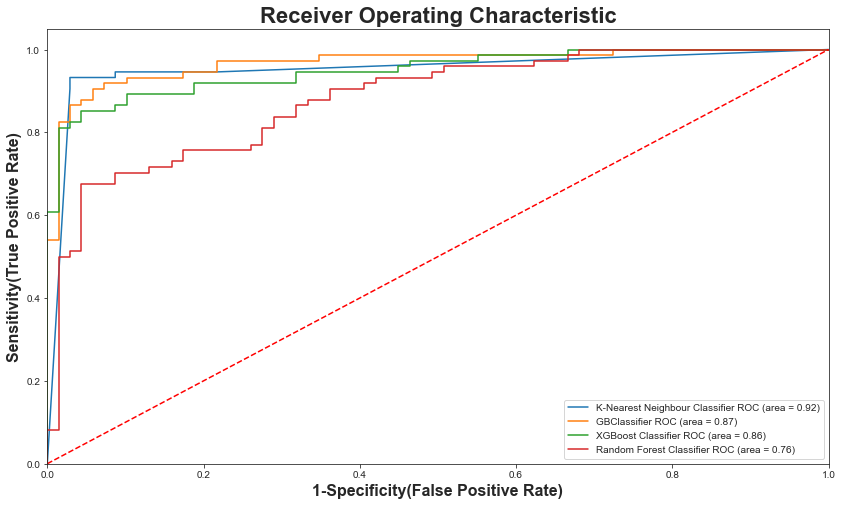

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve
# Add the models to the list that you want to view on the ROC plot
auc_models = [{'label': "K-Nearest Neighbour Classifier", 
               'model': KNeighborsClassifier(**model_param['KNN']), 
               'auc': 0.9230 }, 
              
              {'label': 'GBClassifier', 
               'model': GradientBoostingClassifier(**model_param['GB']), 
               'auc': 0.8671},
              
              {'label': 'XGBoost Classifier', 
               'model': XGBClassifier(**model_param['XGBoost'], n_jobs=-1), 
               'auc': 0.8601}, 
              
              {'label': 'Random Forest Classifier', 
               'model': RandomForestClassifier(**model_param['RF']), 
               'auc': 0.7552}, 
             ]

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# create loop through all model
plt.figure(figsize=(14, 8))
for algo in auc_models:
    model = algo['model']       # select the model
    model.fit(X_train, y_train) # train the model
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)', fontsize=16, fontweight='bold')
plt.ylabel('Sensitivity(True Positive Rate)', fontsize=16, fontweight='bold')
plt.title('Receiver Operating Characteristic', fontsize=22, fontweight='bold')
plt.legend(loc="lower right")

# plt.savefig(r"./images/auc.png")
plt.show()   # Display

- KNN Classifier performs the best compared to other models. 

## Final report

In [51]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}\n".format(score))
print ('classification_report: \n', cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9231

classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        69
           1       0.92      0.93      0.93        74

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



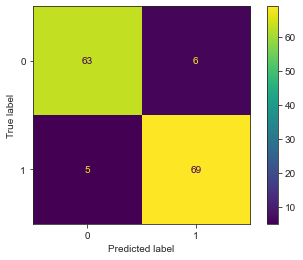

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

### Best Model is KNN Classifier with 92.31 % Accuracy.

### Saving Model : Serialization

In [53]:
import pickle

model = best_model
# open a file, where need to store the data
file = open('best_model.pkl', 'wb')

# dump to file
pickle.dump(model, file)

### Explain how you will export the trained models & deploy it for prediction in production.

- Till now, we have trained model. Now we need to deploy the model for productionsation.


- For prediction in production, we need to **`create fully automated pipeline`**, need to automate all the training steps.
- For the same, we need to write **`code in modular fashion`**, we will write code in **`OOPS`** only, so that in case we need to do some changes in future, we can do easyly.
- **`Exception handling`** is a crital part for the productionisation.


- We will have to **`log`** each and every activity, so that in case of bug or any issue with model, we can identify easyly.
- **`Scalability`** - It is good to make model auto scalable, so that model won't fail if there are number of users increase.
- Need to use fast databases. 


- Model should be able to run on different-different operating platform, for the same we can use **`DockerHub & CI-CD pipeline`**.


- **`Hypercare program`** - We should provide the hypercare program to the client, in case if there is any issue with model after a certain time of period then it is our responsibilty to fix it.


- **`Retraining Approach`** - We can use feedback approach as well as manual approach.

---
---

$$ Thank You ! $$